In [1]:
import os
import json
import xml.etree.ElementTree as ET

import cv2
import pandas
import openslide
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import chain
import matplotlib.pyplot as plt

from pyslide import slide

In [2]:
asap_path='data/annotations/asap_annotations.xml'
imagej_path='data/annotations/imagej_annotations.xml'
json_path='data/annotations/json_annotations.json'
csv_path='data/annotations/csv_annotations.csv'

In [3]:
ndpi_path='14.90610 C L2.11.ndpi'
json_path='14.90610 C L2.11.json'
ann_obj=slide.Annotations(json_path)
annotations=ann_obj.generate_annotations()
slide_obj=slide.Slide(ndpi_path,annotations=annotations)

In [4]:
#image,border=slide_obj.detect_component()

In [5]:
border=slide_obj.get_border(space=200)

In [6]:
region,mask=slide_obj.generate_region()

x_size:12483
y_size:13228


In [7]:
region.shape

(13228, 12483, 3)

In [8]:
list(np.unique(mask))

[0, 255]

In [28]:
x,y=s.dims[0],s.dims[1]
slide_mask=np.zeros((y, x, 3), dtype=np.uint8)

for k in annotations:
    v = annotations[k]
    v = [np.array(a) for a in v]
    cv2.fillPoly(slide_mask, v, color=k)

In [29]:
slide_mask=cv2.resize(slide_mask, (2000,2000))

In [30]:
np.unique(slide_mask,return_counts=True)

(array([0, 1, 2], dtype=uint8), array([11951675,     8651,    39674]))

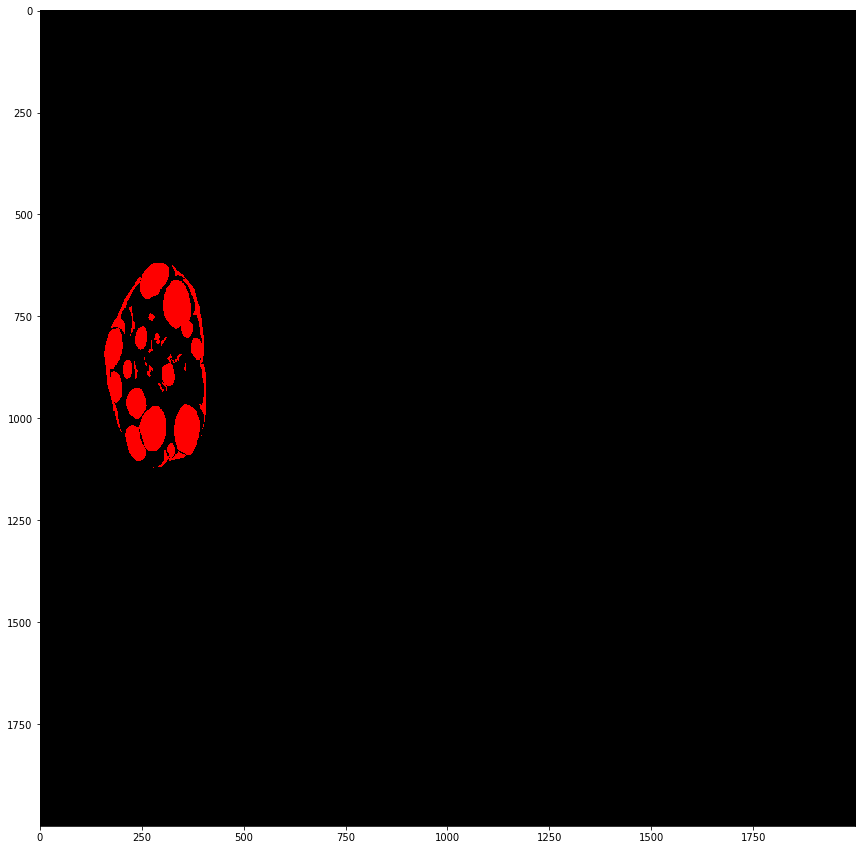

In [31]:
plt.figure(figsize=(15,15))
plt.imshow(slide_mask*255)

In [12]:
x,y=s.dims[0],s.dims[1]
slide_mask=np.zeros((y, x, 3), dtype=np.uint8)

for k in annotations:
    v = annotations[k]
    v = np.array(v)
    cv2.fillPoly(slide_mask, v, color=k+1)
    
slide_mask=cv2.resize(slide_mask, (2000,2000))

KeyboardInterrupt: 

In [ ]:
#print(np.unique(slide_mask))
plt.figure(figsize=(10,10))
plt.imshow(slide_mask)

In [10]:
v=np.array([annotations[1]])
test=cv2.fillPoly(slide_mask, v, color=1)

In [11]:
np.unique(test)

KeyboardInterrupt: 

In [12]:
slide_mask=cv2.resize(test, (2000,2000))

In [17]:
np.unique(slide_mask,return_counts=True)

(array([0, 1], dtype=uint8), array([11999937,       63]))

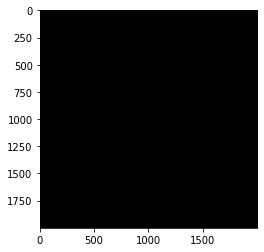

In [21]:
plt.imshow(slide_mask)

### PySlide

In [6]:
slide = pys.Slide('images/14.90610 C L2.11.ndpi',border='draw',annotations=annotations)

In [7]:
slide.save('test.png',(2000,2000))

In [8]:
x = slide.slide_mask((2000,2000))

In [9]:
slide.save('masktest.png',(2000,2000), True)

######NEED TO CHECK WHY MASK IS SQUASHED#######

In [10]:
region, mask = slide.generate_region(mag=4, scale_border=True, factor=256)

x_size:768
y_size:768


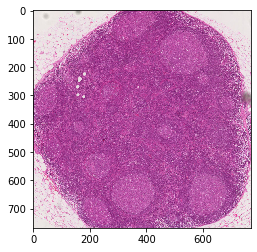

In [11]:
plt.imshow(region)

### Patching

In [12]:
patches = pys.Patching(slide, annotations, mag_level=4)

In [13]:
import time

start_time = time.time()
print(patches.generate_patches(64,'focus'))
print("--- %s seconds ---" % (time.time() - start_time))

37
--- 0.3984701633453369 seconds ---


In [14]:
len(patches.masks)

37

In [15]:
patches.save('images', True)

[Errno 17] File exists: 'images/images'
[Errno 17] File exists: 'images/masks'


In [ ]:
x = openslide.OpenSlide('images/14.90610 C L2.11.ndpi')

In [3]:
patch=x.read_region((12016,25273),4,(256,256))

NameError: name 'x' is not defined

In [5]:
import xml.etree.ElementTree as ET

In [8]:
children = root.getchildren()

/usr/local/Cellar/python@3.7/3.7.9/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  """Entry point for launching an IPython kernel.


In [11]:
tree = ET.parse(xmlstring)
root = tree.getroot()
pixelSpacing = float(root.get('MicronsPerPixel'))

regions = {n.attrib['Name']: n[1].findall('Region') for n in root}
labelAreas = {}

In [12]:
for a in regions:

    region = {}
    for r in regions[a]:
        iD = int(r.get('Id'))
        area = r.attrib['AreaMicrons']
        length = r.attrib['LengthMicrons']
        vertices = r[1].findall('Vertex')
        f = lambda x: (int(float(x.attrib['X'])), int(float(x.attrib['Y'])))
        coords = list(map(f, vertices))
        region[iD] = dict(zip(('area', 'length', 'coords'), (area, length, coords)))
    labelAreas[a] = region

In [20]:
for k, v in labelAreas.items():
    for k2,v2 in v.items():
        print(v2)

{'area': '55105732.7', 'length': '32290.3', 'coords': [(16526, 9382), (65372, 9382), (65372, 30671), (16526, 30671)]}
{'area': '429491.7', 'length': '2727.6', 'coords': [(20942, 24654), (20908, 24654), (20891, 24654), (20875, 24654), (20841, 24654), (20807, 24654), (20773, 24654), (20756, 24654), (20723, 24654), (20672, 24654), (20655, 24654), (20638, 24654), (20621, 24654), (20605, 24654), (20588, 24654), (20571, 24654), (20554, 24654), (20520, 24654), (20503, 24654), (20470, 24654), (20453, 24671), (20419, 24671), (20402, 24688), (20385, 24688), (20351, 24722), (20318, 24722), (20284, 24739), (20250, 24756), (20250, 24773), (20233, 24773), (20200, 24773), (20149, 24789), (20132, 24823), (20115, 24823), (20081, 24840), (20065, 24857), (20031, 24874), (19997, 24874), (19997, 24891), (19980, 24908), (19930, 24924), (19879, 24941), (19845, 24975), (19795, 24992), (19761, 24992), (19744, 25009), (19710, 25026), (19693, 25043), (19660, 25059), (19626, 25093), (19609, 25093), (19592, 25110)

In [ ]:
#pixelSpacing = float(root.get('MicronsPerPixel'))

In [16]:
def oneHotToMask(onehot):
    nClasses =  onehot.shape[-1]
    idx = tf.argmax(onehot, axis=-1)
    colors = sns.color_palette('hls', nClasses)
    multimask = tf.gather(colors, idx)
    multimask = np.where(multimask[:,:,:]==colors[0], 0, multimask[:,:,:])
    
    return multimask

In [ ]:
import numpy as np

one=np.ones((60,60))
two=np.ones((60,60))*2
three=np.ones((60,60))*3

test=np.hstack([one,two,three])

In [ ]:
import tensorflow as tf

colors = sns.color_palette('hls', 3)

np.take_along_axis(test, colors)


#multimask = tf.gather(colors, test)
#multimask = np.where(multimask[:,:,:]==colors[0], 0, multimask[:,:,:])

In [ ]:
#from patch import Patching
from utilities import getRegions 
import openslide
from patch import Patching
import sys 
import cv2 
import numpy as np
import os

classKey = {'SINUS':1}

annotations = getRegions('U_100188_10_X_HIGH_10_L1.xml')

keys = annotations.keys()
for k in list(keys):
    if k not in classKey:
        del annotations[k]

annotations = {classKey[k]: [v2['coords'] for k2, v2 in v.items()] for k,v in annotations.items()}

print(annotations.keys())
slide = openslide.OpenSlide('U_100188_10_X_HIGH_10_L1.ndpi')
p=Patching(slide, annotations, boundaries='draw',mode='focus')
p()
#patches = p.patches
#masks = p.masks


patches = p.extract_patches()
masks = p.extract_masks()

for i, p in enumerate(patches):
    p=np.array(p.convert('RGB'))
    cv2.imwrite(os.path.join('patches', str(i) + '.png'), p)

for i, m in enumerate(masks):
    cv2.imwrite(os.path.join('masks', str(i) + '.png'), m)



'''
for i, _ in enumerate(p.patches):
    patch = p.extract_patch()
    mask = p.extract_mask()
    patch = np.array(patch)
    mask = np.array(mask)
    #print(np.unique(mask))
    cv2.imwrite(os.path.join('patches', str(i) + '.png'), patch)
    cv2.imwrite(os.path.join('masks', str(i) + '.png'), mask)


#x = p.slide_mask*255

#print(np.unique(x))
#cv2.imwrite('test.png', x)
'''
